In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Car details v3.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seats', ylabel='count'>

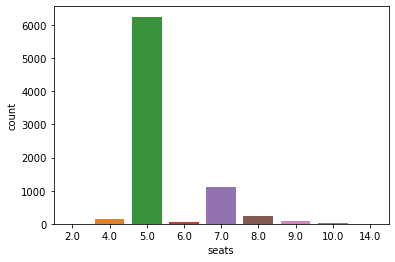

In [5]:
sns.countplot('seats',data=df)

### Most of the vechiles are 5 seater.

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

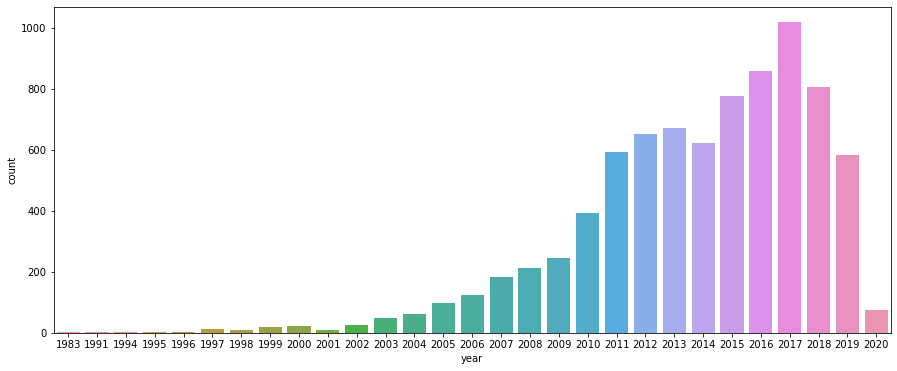

In [6]:
plt.subplots(figsize=(15, 6))
sns.countplot('year',data=df)

### Here, we can see that the highest number of the cars were of the year 2017 while the lowest numbers belong to the period of 90's.

<AxesSubplot:ylabel='fuel'>

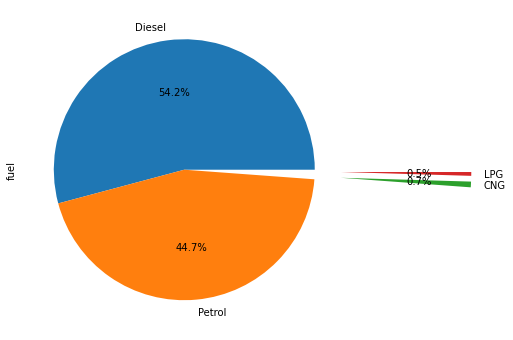

In [7]:
plt.subplots(figsize=(15, 6))
df['fuel'].value_counts().plot.pie(autopct="%.1f%%",explode=[0,0,1.2,1.2])

### The Highest no. of cars work on petrol(54.2%) whereas the least belong to LPG(0.5%).

In [8]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='owner', ylabel='count'>

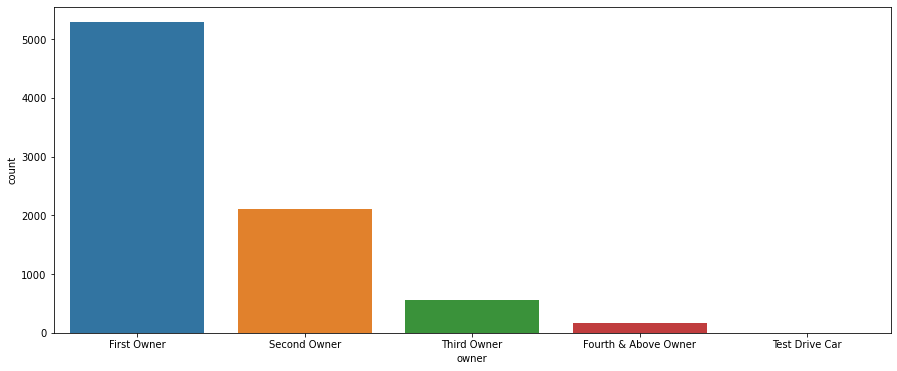

In [9]:
plt.subplots(figsize=(15, 6))
sns.countplot('owner',data=df)

### Usually, most of the owners are the first owner.

<AxesSubplot:ylabel='transmission'>

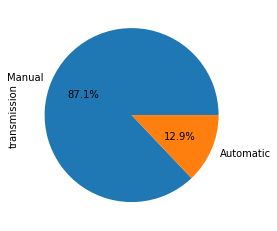

In [10]:
df['transmission'].value_counts().plot.pie(autopct="%.1f%%")

#### Now , we are going to do some encoding over the various parameters in the dataset to make it more finely accessible to the algorithms.

In [11]:
#encoding "fuel" Column
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "seller_type" Column
df.replace({'seller_type':{'Trustmark Dealer':0,'Dealer':1,'Individual':2}},inplace=True)

# encoding "owner" Column
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [12]:
df.loc[(df['km_driven'] >= 500) & (df['km_driven'] <= 15000), 'km_driven'] = 0
df.loc[(df['km_driven'] > 15000) & (df['km_driven'] <= 32000), 'km_driven'] = 1
df.loc[(df['km_driven'] > 32000) & (df['km_driven'] <= 49000), 'km_driven'] = 2
df.loc[(df['km_driven'] > 49000), 'km_driven'] = 3

In [13]:
df.loc[(df['mileage'] > '20 kmpl' ) , 'mileage'] = 0

In [14]:
df.loc[(df['mileage'] != 0 ) , 'mileage'] = 1

In [15]:
df.loc[(df['engine'] >= '1000 CC') & (df['engine'] <= '1500 CC'), 'engine'] = 0

In [16]:
df.loc[(df['engine'] != 0 ) , 'engine'] = 1

In [17]:
df.loc[(df['seats'] == 7) & (df['max_power'] < '200 bhp') | (df['seats'] == 5) & (df['max_power'] < '120 bhp'), 'max_power'] = 1

In [18]:
df.loc[((df['seats'] == 7) | (df['seats'] == 5)) & (df['max_power'] != 1), 'max_power'] = 0

In [19]:
df.loc[(df['max_power'] != 1) & (df['max_power'] != 0) , 'max_power'] = 2

In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,3,1,2,0,0,0,0,0,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,3,1,2,0,1,0,0,1,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,3,0,2,0,2,1,0,0,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,3,1,2,0,0,0,0,0,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,3,0,2,0,0,1,0,0,"11.5@ 4,500(kgm@ rpm)",5.0


### We need to Fill up the NaN values in the dataset to find a better accuracy.

In [55]:
df['mileage']=df['mileage'].fillna(value=df['mileage'].mean())
df['engine']=df['engine'].fillna(value=df['engine'].mean())
df['max_power']=df['max_power'].fillna(value=df['max_power'].mean())

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   int64  
 5   seller_type    8128 non-null   int64  
 6   transmission   8128 non-null   int64  
 7   owner          8128 non-null   int64  
 8   mileage        8128 non-null   int64  
 9   engine         8128 non-null   int64  
 10  max_power      8128 non-null   int64  
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(10), object(2)
memory usage: 825.6+ KB


###  Standardization and Splitting

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
X=df.drop(['name','selling_price','torque','seats'],axis=1)
Y = df['selling_price']

In [72]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble

### Linear Regression

In [75]:
lin_reg_model = LinearRegression() # loading the linear regression model

In [76]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [77]:
training_data_prediction = lin_reg_model.predict(X_train) # prediction on Training data

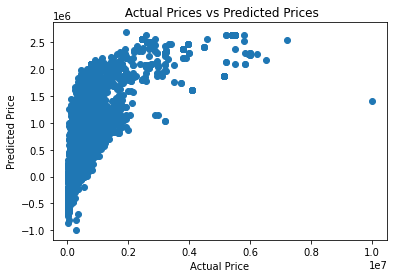

In [78]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [79]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print("Linear regression score : ",lr.score(X_test, Y_test))

Linear regression score :  0.5344824798576262


### Ridge

In [80]:
clf = Ridge(alpha=0.1)
clf.fit(X_train, Y_train)
print("Ridge Regression Score : ", clf.score(X_test, Y_test))
Y_pred = clf.predict(X_test)

Ridge Regression Score :  0.5344827477625868


### Lasso

In [81]:
ls = Lasso()
ls.fit(X_train, Y_train)
Y_pred = ls.predict(X_test)
print("Lasso Score : ", ls.score(X_test, Y_test))

Lasso Score :  0.5344826844012568


### Decision Tree Regressor 

In [82]:
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
print("Decision Tree Regressor Score : ", dt.score(X_test, Y_test))

Decision Tree Regressor Score :  0.8294638858409594


### Gradient Boosting

In [83]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print("Score : ", reg.score(X_test, Y_test))

Score :  0.8174937936823714


### So, we can conclude that Decision tree would be the best algorithm with an accuracy score of around 83%.